在机器学习和统计中，分类是基于包含其类别成员资格已知的观察（或实例）的训练数据集来识别新观察所属的一组类别（子群体）中的哪一个的问题。例如，将给定的电子邮件分配给“垃圾邮件”或“非垃圾邮件”类，并根据观察到的患者特征（性别，血压，某些症状的存在或不存在等）为给定患者分配诊断。 。分类是模式识别的一个例子。

在机器学习的术语中，[1]分类被认为是监督学习的一个实例，即学习可以获得正确识别的观察的训练集的情况。相应的无监督程序称为聚类，并涉及基于固有相似性或距离的某种度量将数据分组。

通常，将各个观察结果分析为一组可量化的属性，不同地称为解释变量或特征。这些属性可以不同地分类（例如，“A”，“B”，“AB”或“O”，对于血型），序数（例如“大”，“中”或“小”），整数值（例如，电子邮件中特定单词的出现次数）或实际值（例如血压的测量值）。

实现分类的算法，特别是在具体实现中，被称为分类器。术语“分类器”有时也指由分类算法实现的数学函数，其将输入数据映射到类别。

跨领域的术语是多种多样的。在统计中，通常使用逻辑回归或类似程序进行分类，观察的属性称为解释变量（或独立变量，回归量等），要预测的类别称为结果，被认为是是因变量的可能值。在机器学习中，观察通常被称为实例，解释变量被称为特征（被分组为特征向量），并且要预测的可能类别是类。其他领域可能使用不同的术语：例如，在社区生态学中，术语“分类”通常是指聚类分析，即一种无监督学习，而不是本文中描述的监督学习。

常用的分类算法包括朴素贝叶斯、逻辑回归、决策树、随机森林、支持向量机等。

分类的主要用途和场景是“预测”，基于已有的样本预测新样本的所属类别。例如信用评级、风险等级、欺诈预测等；同时，它也是模式识别的重要组成部分，广泛应用到机器翻译，人脸识别、医学诊断、手写字符识别、指纹识别的图像识别、语音识别、视频识别的领域；另外，分类算法也可以用于知识抽取，通过模型找到潜在的规律，帮助业务得到可执行的规则。

提炼应用规则：

为数据化运用提供规则，也是分类分析的主要应用方向。

常见应用场景：
+ 对沉默会员做会员重新激活，应该挑选具有何种特征会员
+ 商品选取何种促销活动清仓
+ 那些广告更适合VIP商家的投放需求

提炼特征规则利用的是在构建分类算法时产生的分类规则。


提取变量特征：

从大量的输入变量的重要性特征，然后提取权重较高的几个特征是分类分析的重点应用之一。是数据归约和数据降维的重要方式。获取原始数据集并对数据预处理，然后将数据集放到分类算法中进行训练，然后冲算法模型中提取特征权重信息。

处理缺失值：
将缺失字段作为目标变量进行预测，从而得到较为可能的补全值。

分类分析算法的选取：
+ 文本分类时用到最多的是朴素贝叶斯
+ 训练集比较小，那么选择高偏差且低方差的分类算法效果逢高，如朴素贝叶斯、支持向量机、这些算法不容易过拟合。
+ 训练集比较大，选取何种方法都不会显著影响准去度
+ 省时好操作选着用支持向量机，不要使用神经网络
+ 重视算法准确度，那么选择算法精度高的算法，例如支持向量机、随机森林。
+ 想得到有关预测结果的概率信息，使用逻辑回归
+ 需要清洗的决策规则，使用决策树

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
# 导入评估指标模块
from sklearn.metrics import accuracy_score, auc, confusion_matrix, f1_score, precision_score, recall_score, roc_curve
# 导入表格库
import prettytable
# 导入dot插件库
import pydotplus
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 数据导入
df = pd.read_csv('https://raw.githubusercontent.com/ffzs/dataset/master/glass.csv', usecols=['Na','Ca','Type'])

In [31]:
# 为了决策树图示简洁我们尽量减少分类，和特征值
dfs = df[df.Type < 3]

# 获取特征值
X = dfs[dfs.columns[:-1]].values
# 获取标签值
y = dfs['Type'].values - 1

# 将数据37分为测试集合训练集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2018)

#### 模型训练 ####
# 决策树模型
dt_model = DecisionTreeClassifier(random_state=2018)

# 训练模型
dt_model.fit(X_train, y_train)

# 对测试集做预测
pre_y = dt_model.predict(X_test)

####模型评估####
# 混淆矩阵
confusion_m = confusion_matrix(y_test, pre_y)

df_confusion_m = pd.DataFrame(confusion_m, columns=['0', '1'], index=['0', '1'])

df_confusion_m.index.name = 'Real'
df_confusion_m.columns.name = 'Predict'

df_confusion_m

Predict,0,1
Real,,
0,16,12
1,2,14


In [30]:
# 获取决策树的预测概率
y_score = dt_model.predict_proba(X_test)

# ROC
fpr, tpr, thresholds = roc_curve(y_test, y_score[:, [1]])

# AUC
auc_s = auc(fpr, tpr)

# 准确率
accuracy_s = accuracy_score(y_test, pre_y)

# 精准度
precision_s = precision_score(y_test, pre_y)

# 召回率
recall_s = recall_score(y_test, pre_y)

# F1得分
f1_s = f1_score(y_test, pre_y) 

# 评估数据制表
df_metrics = pd.DataFrame([[auc_s, accuracy_s, precision_s, recall_s, f1_s]], columns=['auc', 'accuracy', 'precision', 'recall', 'f1'], index=['结果'])

df_metrics

,auc,accuracy,precision,recall,f1
结果,0.723214,0.681818,0.538462,0.875,0.666667


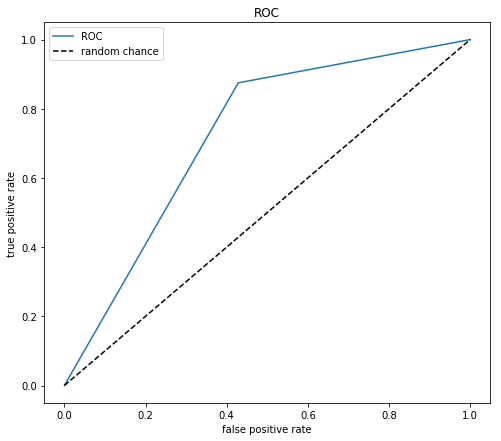

In [23]:
#### 可视化ROC##### 
plt.figure(figsize=(8, 7))
plt.plot(fpr, tpr, label='ROC')  # 画出ROC曲线
plt.plot([0, 1], [0, 1], linestyle='--', color='k', label='random chance')  
# 画出随机状态下的准确率线
plt.title('ROC')  # 子网格标题
plt.xlabel('false positive rate')  # X轴标题
plt.ylabel('true positive rate')  # y轴标题
plt.legend(loc=0)
plt.savefig('x.png')

In [24]:
####保存决策树桂枝图为pdf####
# 决策树规则生成dot对象
dot_data = export_graphviz(dt_model, max_depth=5, feature_names=dfs.columns[:-1], filled=True, rounded=True)

# 通过pydotplus将决策树规则解析为图形
graph = pydotplus.graph_from_dot_data(dot_data)

# 将决策树规则保存为PDF文件
graph.write_pdf('tree.pdf')

graph.write_jpg('xx.jpg')

决策树节点信息：

+ rfm_score是分裂阈值，
+ gini 是在当前规则下的基尼指数，
+ nsamples是当前节点下的总样本量，
+ nvalue为正例和负例的样本数量

混合矩阵：
表示分类正确：
+ 真正（True Positive, TP）：本来是正例，分类成正例。
+ 假正（True Negative, TN）：本来是负例，分类成负例。

表示分类错误：
+ 假负（False Positive, FP）：本来是负例，分类成正例。
+ 真负（False Negative, FN）：本来是正例，分类成负例。


评估指标解释：

+ auc_s:AUC（Area Under Curve）, ROC曲线下的面积。ROC曲线一般位于y=x上方，因此AUC的取值范围一般在0.5和1之间。AUC越大，分类效果越好。
+ accuracy_s：准确率（Accuracy），分类模型的预测结果中将正例预测为正例、将负例预测为负例的比例，公式为：A = (TP + TN)/(TP + FN + FP + TN)，取值范围[0,1]，值越大说明分类结果越准确。
+ precision_s：精确度（Precision），分类模型的预测结果中将正例预测为正例的比例，公式为：P = TP/(TP+FP)，取值范围[0,1]，值越大说明分类结果越准确。
+ recall_s：召回率（Recall），分类模型的预测结果被正确预测为正例占总的正例的比例，公式为：R = TP/(TP+FN)，取值范围[0,1]，值越大说明分类结果越准确。
+ f1_s:F1得分（F-score），准确度和召回率的调和均值，公式为：F1 = 2 ＊ (P ＊R) / (P + R)，取值范围[0,1]，值越大说明分类结果越准确。